In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
import numpy as np

In [5]:
np.max(x_train[0])

255

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

5

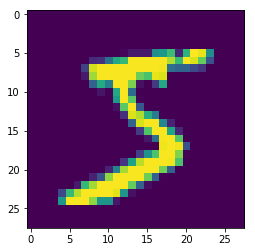

In [7]:
plt.title=y_train[0]
plt.imshow(x_train[0])
y_train[0]

In [8]:
np.max(x_train[0])# 训练集数据归一化

1.0

In [9]:
x_train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train)
train_dataset = tf.data.Dataset.zip((x_train_dataset,y_train_dataset))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [10]:
train_dataset

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

tf.Tensor(5, shape=(), dtype=uint8)
tf.Tensor(0, shape=(), dtype=uint8)


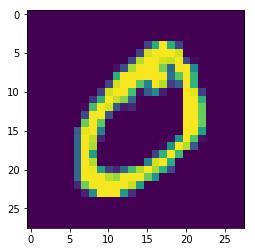

In [11]:
for data,label in train_dataset.take(2):
    plt.imshow(data)
    print(label)

In [12]:
train_data = train_dataset.shuffle(60000).repeat().batch(64)
test_data = test_dataset.repeat().batch(64)

In [13]:
model = keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
#model.compile(optimizer='SGD',loss=keras.losses.CategoricalCrossentropy(),metrics=['sparse_categorical_accuracy'])

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['sparse_categorical_accuracy'])

In [17]:
steps_per_epochs = x_train.shape[0]//64

In [18]:
model.fit(train_data,
          epochs=50,
          steps_per_epoch=steps_per_epochs,
          validation_data=test_data,
          validation_steps=10000//64,
            validation_freq=10
         
         )

Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
937/937 [==============================] - 7s 7ms/step - loss: 0.3005 - sparse_categorical_accuracy: 0.9156
Epoch 2/50
937/937 [==============================] - 4s 4ms/step - loss: 0.1392 - sparse_categorical_accuracy: 0.9592
Epoch 3/50
937/937 [==============================] - 4s 4ms/step - loss: 0.0983 - sparse_categorical_accuracy: 0.9716
Epoch 4/50
937/937 [==============================] - 4s 4ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9774
Epoch 5/50
937/937 [==============================] - 4s 4ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9822
Epoch 6/50
937/937 [==============================] - 4s 4ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9856
Epoch 7/50
937/937 [==============================] - 4s 4ms/step - loss: 0.0397 - sparse_categorical_accuracy: 0.9884
Epoch 8/50
937/937 [==============================] - 4s 5ms/step - loss:

In [19]:
for i in train_data.take(1):
    print(i)

(<tf.Tensor: id=524021, shape=(64, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
     